In [207]:
import pandas as pd
import copy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.compose import make_column_transformer
import category_encoders as ce


In [174]:
mainpath='https://raw.githubusercontent.com/RudraRudra123/Predict_Order_Qty_Changes/master/Data/'
eso_dataset = pd.read_csv(mainpath+'Predictive%20Modelling%20-%20Data%20file-Train.csv')

In [175]:
eso_dataset.head(5)

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,retail_price,replenishment_unit_cost,forecast_start_date,forecast_end_date,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity
0,1,1/2/2017,Monday,s1,50,28483,c654,0,0.625000,16,2.60,18.56,1/2/2017,1/8/2017,8.50,2,48,2,1,1.0
1,2,1/2/2017,Monday,s1,50,40917,c896,0,0.125000,8,2.95,11.28,1/2/2017,1/8/2017,1.95,2,20,2,1,1.0
2,3,1/2/2017,Monday,s1,50,136366,c896,0,0.833333,6,2.50,4.76,1/2/2017,1/8/2017,0.80,5,40,2,1,2.0
3,4,1/2/2017,Monday,s1,50,136344,c762,0,0.375000,8,3.95,15.04,1/2/2017,1/8/2017,1.55,2,20,2,1,1.0
4,5,1/2/2017,Monday,s1,50,136078,c672,0,0.750000,4,2.80,4.56,1/2/2017,1/8/2017,1.15,2,12,2,1,1.0


In [176]:
eso_dataset.columns

Index(['id', 'order_date', 'order_day_of_week', 'store', 'supplier_id',
       'product_id', 'category', 'on_order_quantity', 'on_hand_quantity',
       'product_case_pack', 'retail_price', 'replenishment_unit_cost',
       'forecast_start_date', 'forecast_end_date', 'Ao_Forecast_Quantity',
       'Minimum_Order_Quantity', 'Maximum_Order_Quantity', 'lead_time',
       'suggested_order_quantity', 'actual_order_quantity'],
      dtype='object')

In [177]:
eso_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19668 entries, 0 to 19667
Data columns (total 20 columns):
id                          19668 non-null int64
order_date                  19668 non-null object
order_day_of_week           19668 non-null object
store                       19668 non-null object
supplier_id                 19668 non-null int64
product_id                  19668 non-null int64
category                    19668 non-null object
on_order_quantity           19668 non-null int64
on_hand_quantity            19668 non-null float64
product_case_pack           19668 non-null int64
retail_price                19668 non-null float64
replenishment_unit_cost     19668 non-null float64
forecast_start_date         19668 non-null object
forecast_end_date           19668 non-null object
Ao_Forecast_Quantity        19668 non-null float64
Minimum_Order_Quantity      19668 non-null int64
Maximum_Order_Quantity      19668 non-null int64
lead_time                   19668 non-null i

In [178]:
print('china:', eso_dataset.order_day_of_week.unique())
print(eso_dataset.store.unique())

china: ['Monday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Tuesday' 'Sunday']
['s1' 's2']


In [179]:
eso_dataset.store[0:5]

0    s1
1    s1
2    s1
3    s1
4    s1
Name: store, dtype: object

In [180]:
store_data = cp.deepcopy(eso_dataset)

###Set the date fields

In [181]:
store_data[['order_date', 'forecast_start_date', 'forecast_end_date']][0:5]

,order_date,forecast_start_date,forecast_end_date
0,1/2/2017,1/2/2017,1/8/2017
1,1/2/2017,1/2/2017,1/8/2017
2,1/2/2017,1/2/2017,1/8/2017
3,1/2/2017,1/2/2017,1/8/2017
4,1/2/2017,1/2/2017,1/8/2017


In [182]:
store_data.order_date = pd.to_datetime(store_data.order_date)
store_data.forecast_start_date = pd.to_datetime(store_data.forecast_start_date)
store_data.forecast_end_date = pd.to_datetime(store_data.forecast_end_date)

In [183]:
store_data[['order_date', 'forecast_start_date', 'forecast_end_date']][0:5]

,order_date,forecast_start_date,forecast_end_date
0,2017-01-02,2017-01-02,2017-01-08
1,2017-01-02,2017-01-02,2017-01-08
2,2017-01-02,2017-01-02,2017-01-08
3,2017-01-02,2017-01-02,2017-01-08
4,2017-01-02,2017-01-02,2017-01-08


Check if there are nulls:

In [184]:
store_data.columns[store_data.isnull().any()].tolist()

[]

There are no NULLS in the dataframe

##Inspect category variables

In [185]:

for index, column in enumerate(['order_day_of_week','store','supplier_id','category',]):
  # print(column)
  print(column,':   ',store_data[column].unique())

print('\n other variable is product_id, not printed here as the list is big')
print('total number of unique products:', len(pd.unique(store_data['product_id'])))

order_day_of_week :    ['Monday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Tuesday' 'Sunday']
store :    ['s1' 's2']
supplier_id :    [50 30 40 90 10 70 20 60]
category :    ['c654' 'c896' 'c762' 'c672' 'c773' 'c2052' 'c760' 'c786' 'c767' 'c770'
 'c771' 'c790' 'c781' 'c768' 'c793' 'c794' 'c791' 'c595' 'c901' 'c893'
 'c895' 'c902' 'c906' 'c646' 'c608' 'c900' 'c894' 'c1845' 'c1843' 'c658'
 'c650' 'c596' 'c649' 'c884' 'c662' 'c1844' 'c885' 'c636' 'c661' 'c597'
 'c602' 'c644' 'c891' 'c599' 'c656' 'c647' 'c605' 'c657' 'c607' 'c1037'
 'c801' 'c886' 'c766' 'c653' 'c645' 'c888' 'c1850' 'c603' 'c655' 'c889'
 'c601' 'c800' 'c904' 'c803' 'c805' 'c1101' 'c2056' 'c1102' 'c1045' 'c598'
 'c802' 'c1851' 'c761' 'c621' 'c785' 'c676' 'c986' 'c1106' 'c991' 'c609'
 'c1050' 'c1847' 'c985' 'c990' 'c637' 'c1094' 'c1096' 'c981' 'c1110'
 'c1026' 'c1027' 'c1052' 'c1053' 'c1217' 'c628' 'c764' 'c1552' 'c1566'
 'c1551' 'c1028' 'c1049' 'c1047' 'c1973' 'c1038' 'c669' 'c780' 'c626']

 other variable is product_id, n

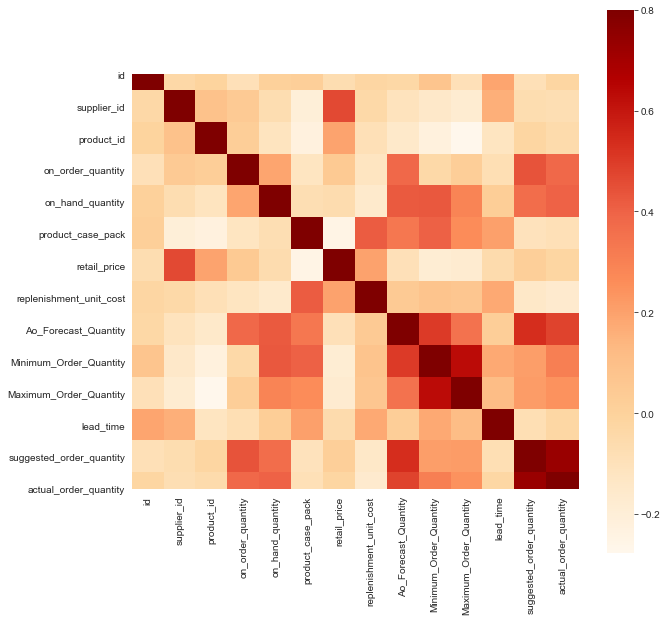

In [186]:
matrix = store_data.corr() 
f, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

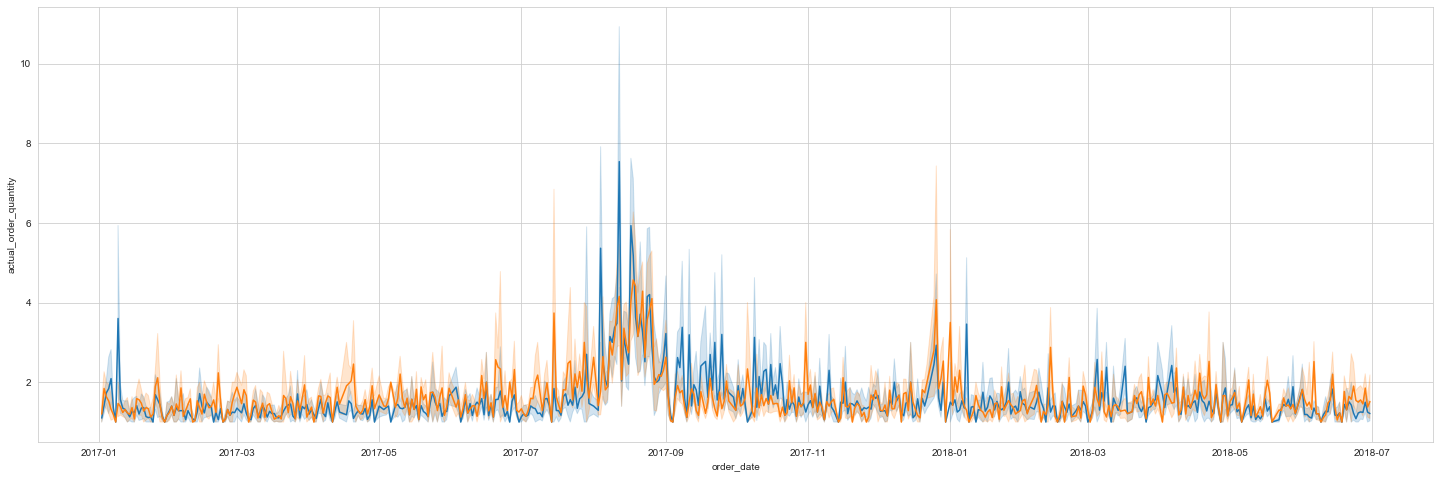

In [187]:
# plt.figsize=(25,25)
# plt.plot(store_data['order_date'],store_data['suggested_order_quantity'],  marker='o')
# plt.plot(store_data['order_date'],store_data['actual_order_quantity'], marker='')

# plt.show()
plt.figure(figsize=(25,8))
sns.lineplot(data=store_data, x="order_date", y="suggested_order_quantity")
sns.lineplot(data=store_data, x="order_date", y="actual_order_quantity")

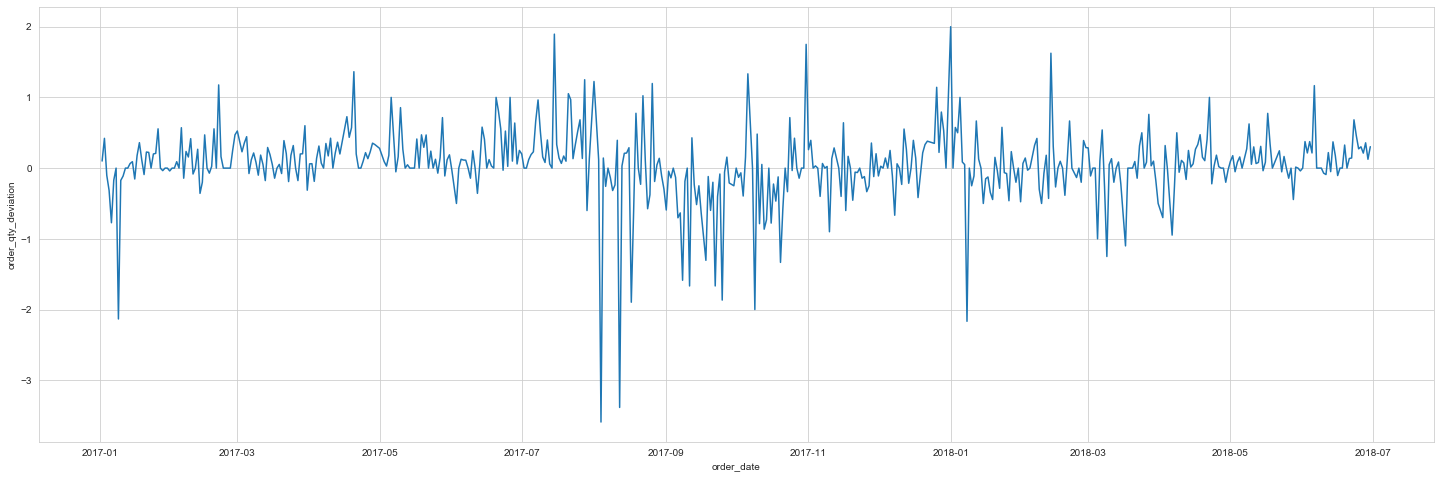

In [188]:
store_data_visualize = pd.DataFrame()
plt.figure(figsize=(25,8))
sns.set_style('whitegrid')
store_data_visualize['order_qty_deviation'] = store_data['actual_order_quantity'] - store_data['suggested_order_quantity']
store_data_visualize['order_date'] = store_data['order_date']
sns.lineplot(data=store_data_visualize, x="order_date", y ='order_qty_deviation', ci=None)

Observation: Adjustments are on both sides. Amendments to order quantity is a frequent activity 

In [189]:
# Create new features
def creatNewFeatures(data):
  data['balance'] = data['on_hand_quantity'] + data['on_order_quantity']
  data['year'] = data['order_date'].dt.year
  data['month'] = data['order_date'].dt.month
  data['day'] = data['order_date'].dt.day
  return data

In [190]:
def typeconversion(data):

  # change date fields to date_format_fields
  data.order_date = pd.to_datetime(data.order_date)
  data.forecast_start_date = pd.to_datetime(data.forecast_start_date)
  data.forecast_end_date = pd.to_datetime(data.forecast_end_date)
  data = data.astype({"order_day_of_week":'category',"store":'category',"supplier_id":'category',"category":'category', "product_id": 'category', "year": 'category',"month": 'category', "day": 'category'})
  data = data.astype({"suggested_order_quantity": 'int', "actual_order_quantity": 'int', "Minimum_Order_Quantity": 'int', "Maximum_Order_Quantity":'int',
                      "on_order_quantity": 'int', "product_case_pack": 'int', "lead_time": 'int'})
  data = data.astype({"on_hand_quantity": 'float', "retail_price": 'float', "Ao_Forecast_Quantity": 'float',"replenishment_unit_cost": 'float'})
  data.info()
  return data

In [191]:
store_data = creatNewFeatures(store_data)

In [192]:
  store_data = typeconversion(store_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19668 entries, 0 to 19667
Data columns (total 24 columns):
id                          19668 non-null int64
order_date                  19668 non-null datetime64[ns]
order_day_of_week           19668 non-null category
store                       19668 non-null category
supplier_id                 19668 non-null category
product_id                  19668 non-null category
category                    19668 non-null category
on_order_quantity           19668 non-null int32
on_hand_quantity            19668 non-null float64
product_case_pack           19668 non-null int32
retail_price                19668 non-null float64
replenishment_unit_cost     19668 non-null float64
forecast_start_date         19668 non-null datetime64[ns]
forecast_end_date           19668 non-null datetime64[ns]
Ao_Forecast_Quantity        19668 non-null float64
Minimum_Order_Quantity      19668 non-null int32
Maximum_Order_Quantity      19668 non-null int32
lead_tim

In [193]:
store_data.head(5)

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,...,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity,balance,year,month,day
0,1,2017-01-02,Monday,s1,50,28483,c654,0,0.625000,16,...,8.50,2,48,2,1,1,0.625000,2017,1,2
1,2,2017-01-02,Monday,s1,50,40917,c896,0,0.125000,8,...,1.95,2,20,2,1,1,0.125000,2017,1,2
2,3,2017-01-02,Monday,s1,50,136366,c896,0,0.833333,6,...,0.80,5,40,2,1,2,0.833333,2017,1,2
3,4,2017-01-02,Monday,s1,50,136344,c762,0,0.375000,8,...,1.55,2,20,2,1,1,0.375000,2017,1,2
4,5,2017-01-02,Monday,s1,50,136078,c672,0,0.750000,4,...,1.15,2,12,2,1,1,0.750000,2017,1,2


In [194]:
store_data_backup = cp.deepcopy(store_data)

In [195]:
store_data= cp.deepcopy(store_data_backup)

In [196]:
# # Encoding for categorical features
# def encoding_features(data):
#     categorical_cols = ['order_day_of_week','store','supplier_id', 'category']
#     #     oneHotEncoder.fit_transform(data['order_day_of_week','store','supplier_id', 'category']
#     oneHotEncoder = OneHotEncoder(sparse = False)
#     column_transform = make_column_transformer(
#         (oneHotEncoder, categorical_cols))

#     array_hot_encoded=column_transform.fit_transform(data)
#     #Convert it to df
#     data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)
#     return data

In [197]:
# # Encoding for categorical features
# def encoding_features(data):
#     categorical_cols = ['order_day_of_week','store','supplier_id']
    
#     oneHotEncoder = OneHotEncoder(sparse = False)
#     transformed_data = oneHotEncoder.fit_transform(data[categorical_cols])
#     print(transformed_data[0:5])
#     # the above transformed_data is an array so convert it to dataframe
#     encoded_data = pd.DataFrame(transformed_data, index=data.index)
#     encoded_data.head(5)
#     # now concatenate the original data and the encoded data using pandas
#     concatenated_data = pd.concat([data, encoded_data], axis=1)
    
#     return encoded_data,concatenated_data

In [198]:
# Target Encoding for categorical features
def encoding_features(data):
    y = data['actual_order_quantity']
    categorical_cols = ['order_day_of_week','store','supplier_id', 'category', 'year', 'month', 'day']
    #Create target encoding object
    encoder=ce.TargetEncoder(cols=categorical_cols) 
    for col in categorical_cols:
        encoder=ce.TargetEncoder(cols=col) 
        data[col] = encoder.fit_transform(data[col], y)
    return data


In [199]:
# drop unnecessary features and createFinalDataSet
def createFinalDataSet(data): 
    data = data.drop(['id', 'product_id','forecast_start_date', 'forecast_end_date', 'on_hand_quantity', 'on_order_quantity'], axis=1)
    return data

In [209]:
#normalize dataset
def minMaxNormalization(data):
    
    for col in data.columns:
        scalar_variable = MinMaxScaler(feature_range = (0,1))
        data[col] = scalar_variable.fit_transform(data[col])
    return data

In [201]:
# store_data = creatNewFeatures(store_data)

In [202]:
store_data.head(5)

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,...,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity,balance,year,month,day
0,1,2017-01-02,Monday,s1,50,28483,c654,0,0.625000,16,...,8.50,2,48,2,1,1,0.625000,2017,1,2
1,2,2017-01-02,Monday,s1,50,40917,c896,0,0.125000,8,...,1.95,2,20,2,1,1,0.125000,2017,1,2
2,3,2017-01-02,Monday,s1,50,136366,c896,0,0.833333,6,...,0.80,5,40,2,1,2,0.833333,2017,1,2
3,4,2017-01-02,Monday,s1,50,136344,c762,0,0.375000,8,...,1.55,2,20,2,1,1,0.375000,2017,1,2
4,5,2017-01-02,Monday,s1,50,136078,c672,0,0.750000,4,...,1.15,2,12,2,1,1,0.750000,2017,1,2


In [203]:
store_data = encoding_features(store_data)

In [204]:
store_data = createFinalDataSet(store_data)

In [205]:
store_data.head(5)

,order_date,order_day_of_week,store,supplier_id,category,product_case_pack,retail_price,replenishment_unit_cost,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity,balance,year,month,day
0,2017-01-02,1.699686,1.78448,1.573396,1.050360,16,2.60,18.56,8.50,2,48,2,1,1,0.625000,1.842885,1.471576,1.542857
1,2017-01-02,1.699686,1.78448,1.573396,1.103970,8,2.95,11.28,1.95,2,20,2,1,1,0.125000,1.842885,1.471576,1.542857
2,2017-01-02,1.699686,1.78448,1.573396,1.103970,6,2.50,4.76,0.80,5,40,2,1,2,0.833333,1.842885,1.471576,1.542857
3,2017-01-02,1.699686,1.78448,1.573396,1.262023,8,3.95,15.04,1.55,2,20,2,1,1,0.375000,1.842885,1.471576,1.542857
4,2017-01-02,1.699686,1.78448,1.573396,1.103070,4,2.80,4.56,1.15,2,12,2,1,1,0.750000,1.842885,1.471576,1.542857


In [210]:
store_data = minMaxNormalization(store_data)

ValueError: Expected 2D array, got 1D array instead:
array=[1.4833152e+18 1.4833152e+18 1.4833152e+18 ... 1.5301440e+18 1.5301440e+18
 1.5301440e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
# store_data_dates = pd.DataFrame()
# store_data_dates['forecast_duration'] = store_data['forecast_end_date'] - store_data['forecast_start_date']
# # store_data_dates['forecast_duration'].unique()
# # pd.unique(pd.Series([store_data_dates['forecast_duration']]))

# store_data_dates.query("forecast_duration != '6'")